In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
from collections import defaultdict
import cmath
import math

In [2]:
# variables
T0 = 2
T1 = 0.25
w0 = 2*math.pi/T0
A = 1/T1
N1 = 10
N2 = 25

In [3]:
t_unit = []
iterator = np.arange(0,5,0.05)
for i in iterator:
    if abs(i-T0) < T1/2:
        t_unit.append(i)
t_unit

[1.9000000000000001, 1.9500000000000002, 2.0, 2.0500000000000003, 2.1]

In [4]:
width = t_unit[-1]-t_unit[0]

In [5]:
omega = np.linspace(-5*2*math.pi/width,5*2*math.pi/width, 100)
# omega = np.linspace(-150,150, 300)
omega

array([-157.07963268, -153.90630677, -150.73298085, -147.55965494,
       -144.38632903, -141.21300312, -138.0396772 , -134.86635129,
       -131.69302538, -128.51969947, -125.34637355, -122.17304764,
       -118.99972173, -115.82639581, -112.6530699 , -109.47974399,
       -106.30641808, -103.13309216,  -99.95976625,  -96.78644034,
        -93.61311443,  -90.43978851,  -87.2664626 ,  -84.09313669,
        -80.91981077,  -77.74648486,  -74.57315895,  -71.39983304,
        -68.22650712,  -65.05318121,  -61.8798553 ,  -58.70652939,
        -55.53320347,  -52.35987756,  -49.18655165,  -46.01322573,
        -42.83989982,  -39.66657391,  -36.493248  ,  -33.31992208,
        -30.14659617,  -26.97327026,  -23.79994435,  -20.62661843,
        -17.45329252,  -14.27996661,  -11.10664069,   -7.93331478,
         -4.75998887,   -1.58666296,    1.58666296,    4.75998887,
          7.93331478,   11.10664069,   14.27996661,   17.45329252,
         20.62661843,   23.79994435,   26.97327026,   30.14659

In [6]:
# find period of sequantial signals
times = defaultdict(list)
for n in range(1,3):
    for t in iterator:
        if abs(t-n*T0) < T1/2:
            times[n].append(t)
# times = np.array(times.values()).mean()
np.mean(np.asarray(list(times.values())), axis=0)

array([2.9 , 2.95, 3.  , 3.05, 3.1 ])

In [7]:
t2 = t_unit[-1]

In [55]:
def unit_func(w):
    return A*width*cmath.exp(-1j*w*T0)*np.sinc(w*width/2/math.pi)

In [65]:
# using abs() refer my plot to amplitude representaion
shifted_pulse = []
for w in omega:
    shifted_pulse.append(abs(unit_func(w)))

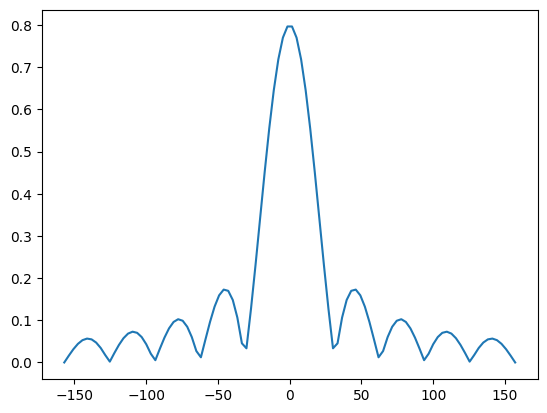

In [66]:
plt.plot(omega, shifted_pulse)

In [52]:
def cn_coef(N):
#     return A*width/T0*cmath.exp(-1j*2*math.pi*N)*np.sinc(N*width/T0)
    return A*width/T0*np.sinc(N*width/T0)

In [72]:
pereodic_cn_coef = []
cn_x = np.arange(-N1,N1,1)
for n in cn_x:
    pereodic_cn_coef.append(cn_coef(n))
pereodic_cn_coef

[1.286790760043359e-16,
 0.04371696191482079,
 0.09354892837886397,
 0.14715320422870973,
 0.20182046097084191,
 0.25464790894703254,
 0.3027306914562628,
 0.34335747653365584,
 0.37419571351545555,
 0.3934526572333863,
 0.3999999999999999,
 0.3934526572333863,
 0.37419571351545555,
 0.34335747653365584,
 0.3027306914562628,
 0.25464790894703254,
 0.20182046097084191,
 0.14715320422870973,
 0.09354892837886397,
 0.04371696191482079]

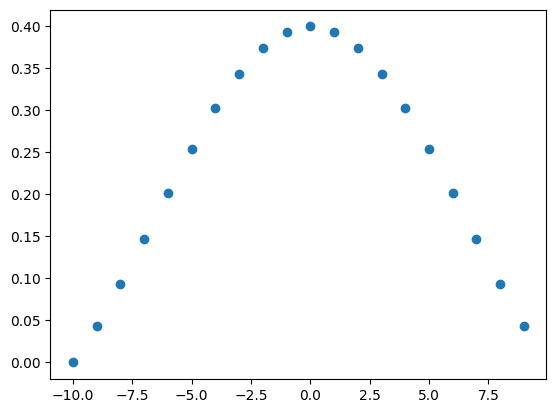

In [73]:
plt.scatter(cn_x, pereodic_cn_coef)

In [74]:
peaks, _ = find_peaks(pereodic_cn_coef)
peaks.dtype

dtype('int64')

In [75]:
pereodic_cn_coef = np.asarray(pereodic_cn_coef)**2

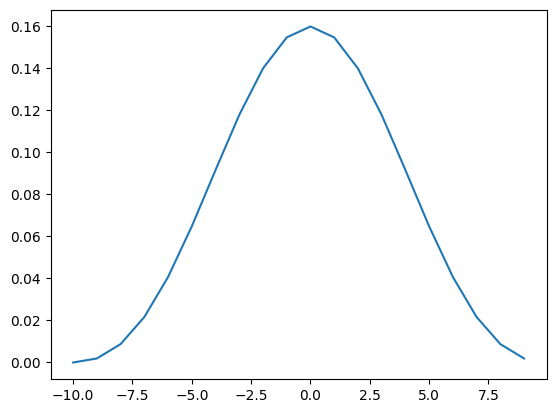

In [76]:
plt.plot(cn_x, pereodic_cn_coef)

TypeError: only integer scalar arrays can be converted to a scalar index

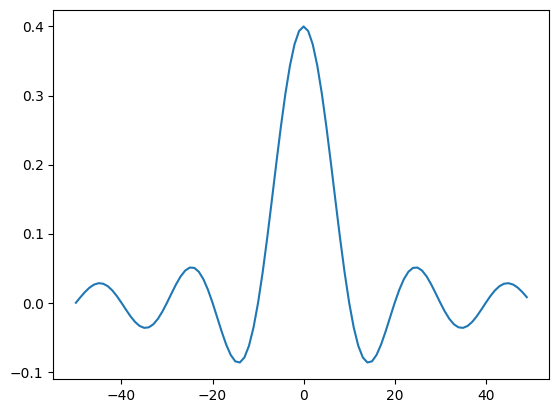

In [24]:
plt.plot(cn_x, pereodic_cn_coef)
plt.plot(peaks, pereodic_cn_coef[peaks], "x")